In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
# figure out who is who in each trio
import glob
ped_file = '/data/sudregp/cnv/simplex.ped'
wes_prefix = ['CLIA', 'CCGO', 'WPS']
trios = []
affected = []
controls = []
samples = []
famids = []
fid = open(ped_file, 'r')
for line in fid:
    famid, sid, fa, mo, sex, aff = line.rstrip().split('\t')
    if fa[:4] in wes_prefix and mo[:4] in wes_prefix and sid[:4] in wes_prefix:
        fam = {}
        fam['child'] = sid
        if aff == '1':
            affected.append(sid)
        else:
            controls.append(sid)
        fam['father'] = fa
        fam['mother'] = mo
        fam['famid'] = famid
        trios.append(fam)
        samples += [sid, fa, mo]
        famids.append(famid)
fid.close()
samples = set(samples)
famids = set(famids)

fid = open('/data/sudregp/cnv/kid_samples.txt', 'r')
good_kids = [line.rstrip() for line in fid]
fid.close()

In [9]:
# merge kid info with phenotype
pheno_fname = '/home/sudregp/data/cnv/sx_simplex.csv'
df1 = pd.read_table('/home/sudregp/data/cnv/nisc_to_mrn.txt')
df2 = pd.read_csv(pheno_fname)

pcorrs = []
scorrs = []
titles = []
data_dir = '/home/sudregp/data/cnv/xhmm/'
files = glob.glob(data_dir + '/denovo_q60*cnv.indiv')
for f in files:
    # open PLINK file and grab the burden for all kids
    df = pd.read_table(f, delimiter='\s+', index_col=1)
    kids = [t['child'] for t in trios]
    ncnv = []
    for kid in kids:
        idx = [i for i in range(df.shape[0]) if df.index[i].find(kid) >= 0][0]
        ncnv.append(int(df.iloc[idx]['NSEG']))
    df3 = pd.DataFrame(ncnv, index=kids, columns=['ncnv'])
    data = pd.merge(df1, df2, left_on='ID', right_on='MRN')
    data = pd.merge(data, df3, left_on='code', right_index=True)
    ans = data.corr()['ncnv'][3:-1]
    # save the result if it's not NaN all across the board
    if not np.isnan(ans).all():
        pcorrs.append(ans)
        scorrs.append(data.corr(method='spearman')['ncnv'][3:-1])
        t_str = '.'.join(f.split('/')[-1].split('.')[:-2])
        titles.append(t_str)


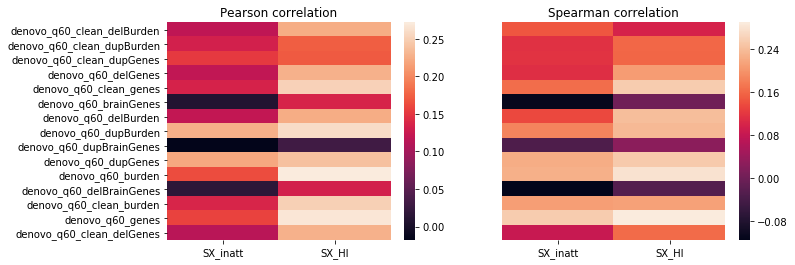

In [10]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(pcorrs, index=titles))
plt.title('Pearson correlation')
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(scorrs, index=titles), yticklabels=False)
plt.title('Spearman correlation')

In [32]:
fname1 = '/home/sudregp/data/cnv/sx_simplex.csv'
pheno1 = pd.read_csv(fname1).drop(['Unnamed: 0', 'Date'], axis=1)
fname2 = '/home/sudregp/data/cnv/neuropsych_09062017.csv'
pheno2 = pd.read_csv(fname2)
df2 = pd.merge(pheno1, pheno2, on='MRN', how='outer')

df1 = pd.read_table('/home/sudregp/data/cnv/nisc_to_mrn.txt')

pcorrs = []
scorrs = []
titles = []
data_dir = '/home/sudregp/data/cnv/xhmm/'
files = glob.glob(data_dir + '/denovo_q60*cnv.indiv')
for f in files:
    # open PLINK file and grab the burden for all kids
    df = pd.read_table(f, delimiter='\s+', index_col=1)
    kids = [t['child'] for t in trios]
    ncnv = []
    for kid in kids:
        idx = [i for i in range(df.shape[0]) if df.index[i].find(kid) >= 0][0]
        ncnv.append(int(df.iloc[idx]['NSEG']))
    df3 = pd.DataFrame(ncnv, index=kids, columns=['ncnv'])
    data = pd.merge(df1, df2, left_on='ID', right_on='MRN')
    data = pd.merge(data, df3, left_on='code', right_index=True)
    ans = data.corr()['ncnv'][2:-1]
    # save the result if it's not NaN all across the board
    if not np.isnan(ans).all():
        pcorrs.append(ans)
        scorrs.append(data.corr(method='spearman')['ncnv'][2:-1])
        t_str = '.'.join(f.split('/')[-1].split('.')[:-2])
        titles.append(t_str)

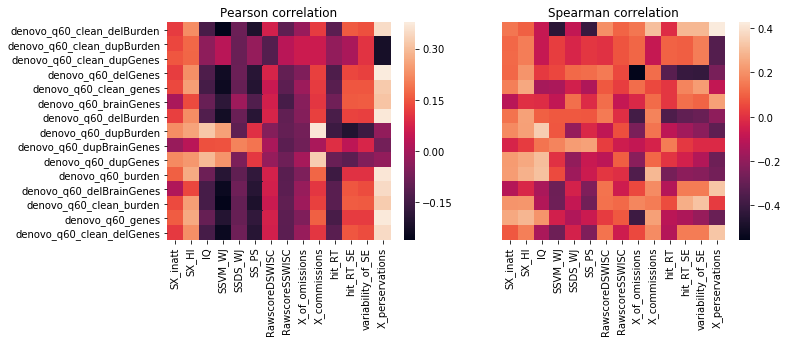

In [33]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(pcorrs, index=titles))
plt.title('Pearson correlation')
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(scorrs, index=titles), yticklabels=False)
plt.title('Spearman correlation')